In [1]:
import numpy as np
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt
from numpy.matlib import repmat
from sklearn.preprocessing import normalize

%matplotlib inline

# B

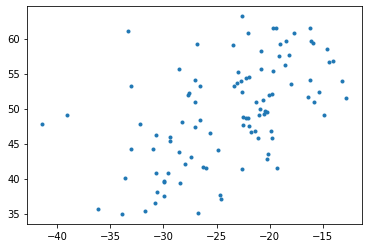

In [15]:
# 1.

matplotlib.pyplot.scatter(hw4data[0], hw4data[1], marker = '.')
plt.plot()
plt.savefig('hw4B.png')

In [16]:
#2.

mean_vec1 = np.array([np.mean(hw4data[0]), np.mean(hw4data[1])] ).T
mean_vec = np.mean(hw4data, 1)
mean_vec.shape

(2,)

In [17]:
#3. 

Z1 = np.array([ hw4data[0] - mean_vec[0], hw4data[1] - mean_vec[1]] )

Z = hw4data - np.matlib.repmat(mean_vec,1,100).reshape(2,100)
n = hw4data.shape[1]

cov_mat = (1/n)*Z.dot(Z.T)
cov_mat

array([[2729.702243  ,   14.97882119],
       [  14.97882119, 2707.65584661]])

# C

In [18]:
#1

eigvals, V_old = np.linalg.eig(cov_mat)

In [19]:
#2

print(V_old, eigvals)

[[ 0.89238922 -0.45126653]
 [ 0.45126653  0.89238922]] [2737.27678613 2700.08130347]


#2 eigenvector corresponding to the largest eigenvalue: [ 0.89238922 -0.45126653]

#3 eigenvector corresponding to the smallest eigenvalue:[ 0.45126653  0.89238922]

In [20]:
#4

Vsort, Dsort = eigsort(V_old, eigvals)

In [21]:
#5

print(V_old, Vsort)

[[ 0.89238922 -0.45126653]
 [ 0.45126653  0.89238922]] [[ 0.89238922 -0.45126653]
 [ 0.45126653  0.89238922]]


#5

It is simply ordering the eigenvectors.

# D

In [22]:
pca_coord = Vsort[0].T * ( np.array([-35,40]) - mean_vec)

In [23]:
#1 

pca_coord

array([-10.0037764 ,   4.26987978])

The new coordinates are [-10.0037764 ,   4.26987978]

[]

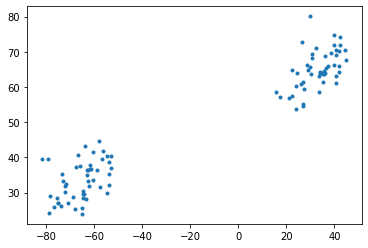

In [25]:
#2

pca_coords = Vsort.T.dot(Z)
#for i in hw4data[1].shape:
matplotlib.pyplot.scatter(pca_coords[0], pca_coords[1], marker = '.')
plt.plot()



#3

We can now see visible clusters

# E

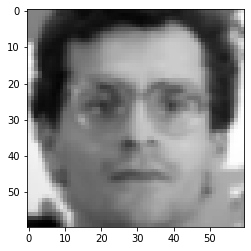

In [28]:
# 1

viewcolumn(faces[:,4])

In [29]:
# 2

mean_face = np.mean(faces, 1)

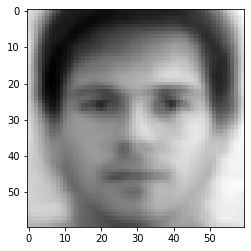

In [207]:
viewcolumn(mean_face)

In [47]:
# 3

A=faces-np.matlib.repmat(mean_face,48,1).T

In [112]:
# 4 
cov_mat = A.T.dot(A)
eigvals, V_old = np.linalg.eig(cov_mat)

In [116]:
# 5

V, Dsort = eigsort(V_old, eigvals)

In [117]:
# 6

U = A.dot(V)

In [120]:
# 7 

U = normc(U)

# F

In [133]:
c = U.T.dot(faces[:,4] - mean_face)

# G

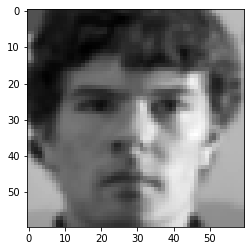

In [134]:
# 1
viewcolumn(faces[:,2])

In [135]:
#2

z = U.dot(c) + mean_face

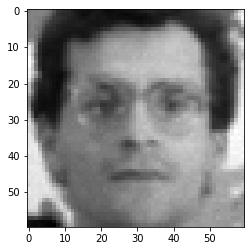

In [136]:
#3

viewcolumn(z)

# H

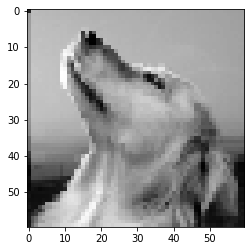

In [190]:
#1

viewcolumn(dog)

In [146]:
# 2

c2 = U.T.dot(dog.reshape(3600,) - mean_face)


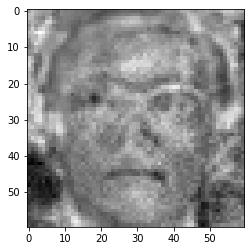

In [148]:
# 3

dogz = U.dot(c2) + mean_face
viewcolumn(dogz) 

# I

In [165]:
# 1

newfaces = np.delete(faces,np.s_[3:6],axis=1)
mean_newface = np.mean(newfaces, 1)
A_new = newfaces-np.matlib.repmat(mean_newface,45,1).T

newcov_mat = A_new.T.dot(A_new)
new_eigvals, new_V_old = np.linalg.eig(newcov_mat)
newV, newDsort = eigsort(new_V_old, new_eigvals)
newU = A_new.dot(newV)
newU = normc(newU)

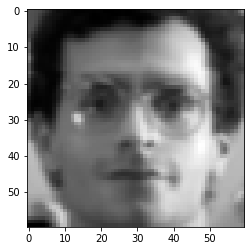

In [168]:
# 2

viewcolumn(faces[:,5])

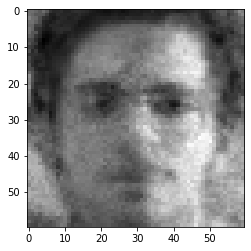

In [169]:
# 3

c3 = newU.T.dot(faces[:,5] - mean_newface)

newz = newU.dot(c3) + mean_newface
viewcolumn(newz)


#4

The face space represents it pretty well as the glasses are still slightly visible, the hair is accurate and the shading is accurate.

## `eigsort.m`

In [10]:
# [Vsort,Dsort] = eigsort(V, eigvals)
#
# Sorts a matrix eigenvectors and a array of eigenvalues in order 
# of eigenvalue size, largest eigenvalue first and smallest eigenvalue
# last.
#
# Example usage:
# di, V = np.linarg.eig(L)
# Vnew, Dnew = eigsort(V, di)
#
# Tim Marks 2002

In [11]:
def eigsort(V, eigvals):
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

## `viewcolumn.m`

In [12]:
# viewcolumn(columnvector);
# VIEWCOLUMN Displays a 60 x 60 grayscale image stored in a column vector.
# Tim Marks 2002

def viewcolumn(columnvector):
    plt.imshow(columnvector.reshape([60, 60], order='F'), cmap=plt.get_cmap('gray'))

In [13]:
# normc(M) normalizes the columns of M to a length of 1.

def normc(Mat):
    return normalize(Mat, norm='l2', axis=0)

## Load .mat files

In [14]:
hw4data = np.loadtxt('hw4data.mat')
hw4bdata = sio.loadmat('hw4bdata.mat')
faces = hw4bdata['faces']
dog = hw4bdata['dog']
x = hw4bdata['x']